# Dataset figure

### Installing and loading libraries

In [1]:
import os
import pandas as pd
import sys
import re
import json
import librosa
import librosa.display
from IPython.display import Audio
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import glob
from pandas.core.common import flatten
import shutil
import pickle
import seaborn as sns
import collections

### Setting constants

Setting project, input and output folders.

In [2]:
wd = os.getcwd()
DATA = os.path.join(os.path.sep, str(Path(wd).parents[0]), "data", "processed")
FIGURES = os.path.join(os.path.sep, str(Path(wd).parents[0]), "reports", "figures")
DF = (os.path.join(os.path.sep, DATA, "df_focal_reduced.pkl"))

Reading in labelfile

In [3]:
df = pd.read_pickle(DF)
dftype='reduced'

(0.0, 2200.0)

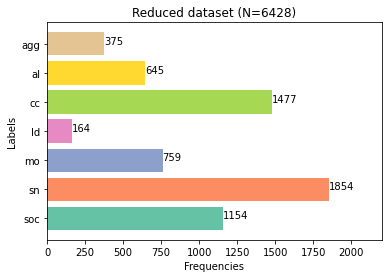

In [4]:
labelcounts = pd.DataFrame(df['call_lable'].value_counts())
labelcounts.sort_index(inplace=True, ascending=False)
pal = sns.color_palette("Set2", n_colors=len(labelcounts.index))
plt.barh(labelcounts.index, labelcounts.call_lable.values, color = pal)

for index, value in enumerate(labelcounts.call_lable.values):
    plt.text(value, index, str(value))

plt.title(dftype.capitalize()+' dataset (N='+str(df.shape[0])+')')
plt.ylabel('Labels')
plt.xlabel('Frequencies')
plt.xlim(0,2200)

In [5]:
FFT_WIN = 0.03 # --> length of audio chunk when applying STFT in seconds
               # FFT_WIN * samplerate = number of audio datapoints that go in one fft (=n_fft)
FFT_HOP = FFT_WIN/8 # --> hop_length in seconds

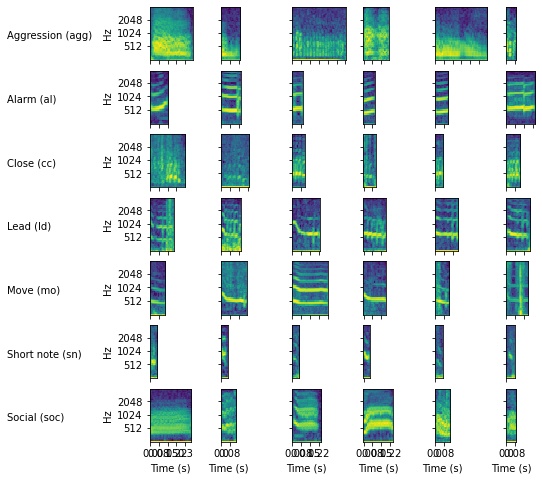

In [6]:
# Randomly choose 6 calls per calltype

calltypes = sorted(list(set(df.call_lable.values)))
n_examples = 6
freq_label_list = ['512', '1024', '2048']
major_tick_interval = 20
rotate_x = 0
f_to_s = 0.00375

fig_name = 'calltype_examples.png'
fig = plt.figure(figsize=(10,8))

k=1

call_dict = dict(zip(calltypes, ['Aggression', 'Alarm', 'Close', 'Lead', 'Move', 'Short note', 'Social']))
for calltype in calltypes:
    
    description = call_dict[calltype]+" ("+calltype+")"
    plt.subplot(len(calltypes), n_examples+2, k)
    plt.axis('off')
    plt.text(0,0.4, description)
    k=k+1
    
    plt.subplot(len(calltypes), n_examples+2, k)
    plt.axis('off')
    k=k+1
    
    r=1
    df_subset = df.loc[df.call_lable==calltype,:]
    # randomly choose 6
    examples = df_subset.sample(n=n_examples, random_state=2204)
    
    specs = examples.spectrograms
    srs = examples.samplerate_hz

    for spec, sr in zip(specs, srs):
        plt.subplot(len(calltypes), n_examples+2, k)
        plt.imshow(spec, interpolation='nearest', origin='lower', aspect=3) 
        ax = plt.gca()
        ax.set_anchor('W')
        
        librosa.frames_to_time(np.arange(0,spec.shape[1],1),sr=sr, hop_length=int(FFT_HOP * sr))
        
        major_xticks = np.arange(0,spec.shape[1], major_tick_interval) 
        major_xtick_labels = ["" for x in major_xticks]
        
        major_yticks = [10,20,30]
        major_ytick_labels = ["" for x in major_yticks]

        if r==1:
            major_ytick_labels = freq_label_list
            plt.ylabel('Hz')
 
        if k>49:
            major_xtick_labels = [round(x*f_to_s,2) for x in major_xticks]
            plt.xlabel('Time (s)')
        
        plt.xticks(major_xticks, major_xtick_labels, rotation=rotate_x)
        plt.yticks(major_yticks, major_ytick_labels)
            
        k=k+1
        r=r+1
        
#lt.tight_layout() 
#plt.savefig(os.path.join(os.path.sep,FIGURES,fig_name), facecolor="white")

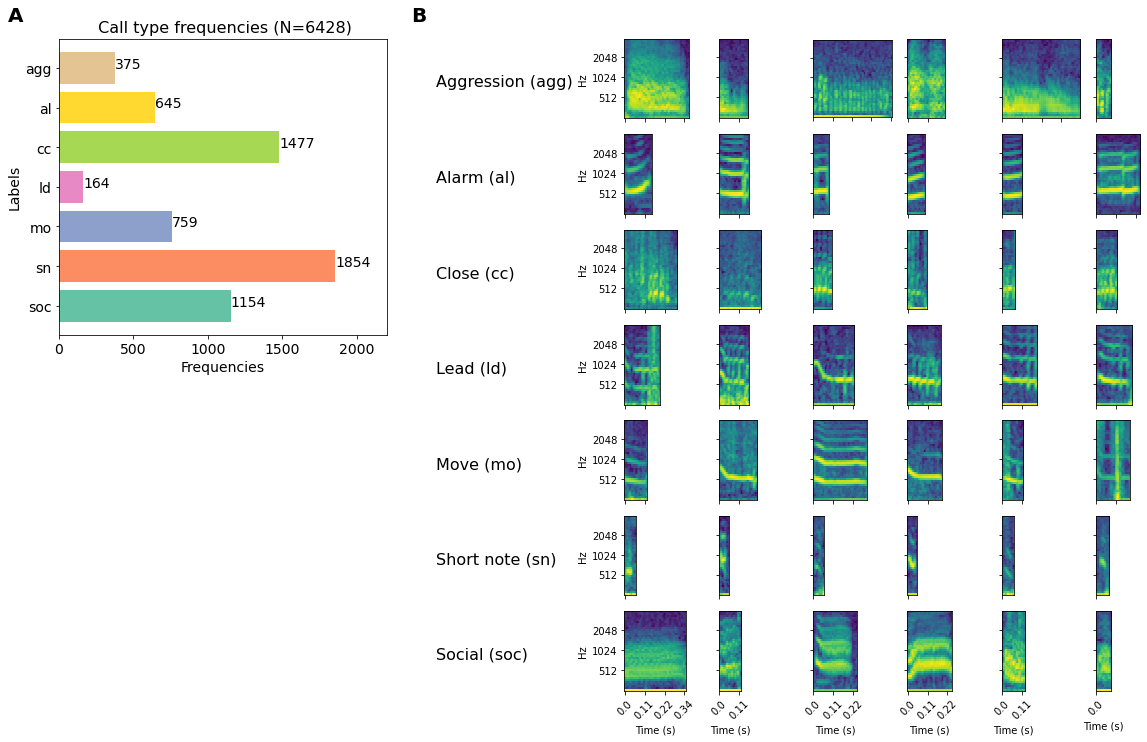

In [7]:
# Randomly choose 6 calls per calltype

major_tick_interval = 30
f_to_s = 0.00375
rotate_x = 45

fig = plt.figure(figsize=(20,12))

plt.subplot(2, 3, 1)

labelcounts = pd.DataFrame(df['call_lable'].value_counts())
labelcounts.sort_index(inplace=True, ascending=False)
pal = sns.color_palette("Set2", n_colors=len(labelcounts.index))
plt.barh(labelcounts.index, labelcounts.call_lable.values, color = pal)

for index, value in enumerate(labelcounts.call_lable.values):
    plt.text(value, index, str(value), fontsize=14)

plt.title(' Call type frequencies (N='+str(df.shape[0])+')', fontsize=16)
plt.ylabel('Labels', fontsize=14)
plt.xlabel('Frequencies', fontsize=14)
plt.xlim(0,2200)
plt.tick_params(labelsize=14)


calltypes = sorted(list(set(df.call_lable.values)))
n_examples = 6
x_label_list = ['512', '1024', '2048']
fig_name = 'paper_dataset.png'

nrows = 7
ncols = 12
n_inc = 4
n_start = n_inc + 1

k=n_start
call_dict = dict(zip(calltypes, ['Aggression', 'Alarm', 'Close', 'Lead', 'Move', 'Short note', 'Social']))
for calltype in calltypes:
    
    # text box fake plot
    description = call_dict[calltype]+" ("+calltype+")"
    plt.subplot(nrows, ncols, k)
    plt.axis('off')
    plt.text(0,0.4, description, fontsize=16)
    k=k+1
    
    # empty space
    plt.subplot(nrows, ncols, k)
    plt.axis('off')
    k=k+1
    
    r=1
    df_subset = df.loc[df.call_lable==calltype,:]
    
    # randomly choose n_examples spectrograms
    examples = df_subset.sample(n=n_examples, random_state=2204)
    
    specs = examples.spectrograms
    srs = examples.samplerate_hz

    for spec, sr in zip(specs, srs):
        plt.subplot(nrows, ncols, k)
        plt.imshow(spec, interpolation='nearest', origin='lower', aspect=3) 
        
        # Align all to the left
        ax = plt.gca()
        ax.set_anchor('W')
                
        # Set ticks and labels
        major_xticks = np.arange(0,spec.shape[1], major_tick_interval) 
        major_xtick_labels = ["" for x in major_xticks]
        
        major_yticks = [10,20,30]
        major_ytick_labels = ["", "", ""]
        
        # If first spec in row, add ylabels
        if r==1:
            major_ytick_labels = x_label_list
            plt.ylabel('Hz')
            
        # If last row, add xlabels
        if k>((nrows-1)*ncols):
            major_xtick_labels = [round(x*f_to_s,2) for x in major_xticks]
            plt.xlabel('Time (s)')
        
        plt.xticks(major_xticks, major_xtick_labels, rotation=rotate_x)
        plt.yticks(major_yticks, major_ytick_labels)
            
        k=k+1
        r=r+1
    k=k+n_inc

plt.figtext(0.09,0.9, "A", size=20, weight='bold')
plt.figtext(0.37,0.9, "B", size=20, weight='bold')
#plt.tight_layout() 
plt.savefig(os.path.join(os.path.sep,FIGURES,'paper_dataset.png'), facecolor="white", bbox_inches="tight")